In [2]:
"""
Thibaud Cazanave for Notüv team
Tech Challenge with Circulor


The goal of this module is to provide a technical description of our technical solution

There will be here a lot of plots and charts that will be useless in the day-to-day use of
the solution but that are here to help understand what is going on

Start: 05/07/2021
"""

'\nThibaud Cazanave for Notüv team\nTech Challenge with Circulor\n\n\nThe goal of this module is to provide a technical description of our technical solution\n\nThere will be here a lot of plots and charts that will be useless in the day-to-day use of\nthe solution but that are here to help understand what is going on\n\nStart: 05/07/2021\n'

We are going to rely on the following link
https://www.wisdomgeek.com/development/machine-learning/sarima-forecast-seasonal-data-using-python/


# Import

In [1]:
### Import existing Python modules

import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib
import pmdarima as pm

# Data

We are going to test the SARIMAX model on three different data sets.

In [2]:
"""
Data import 

We are using the shampoo sales data set as an example here. The data set might be found on this link:
https://machinelearningmastery.com/time-series-datasets-for-machine-learning.

This part is not part of the solution itself : the example data set has to be transformed so that the
French time encoding fit with Python grammar
"""

data=pd.read_csv('C:\\Users\\Utilisateur\\Desktop\\TUM\\Tech Challenge\\Shampoo_data_set.csv',sep=";")



from datetime import date
from time import strptime


data["Date"]=pd.to_datetime(data["Month"])
ts_month_avg=data["Month"].copy()

data["Day"]=""
data["Month"]=""
data["Year"]=""

for j in range(len(data)):
    data.loc[j,"Day"]= data.loc[j,"Date"].day
    data.loc[j,"Month"]= data.loc[j,"Date"].month
    data.loc[j,"Year"]= data.loc[j,"Date"].year
    
data["Date"]=data["Year"].astype(str)+'-'+data["Day"].astype(str)+'-'+data["Month"].astype(str)
data["Date"]=pd.to_datetime(data["Date"])
data.sort_values(by = 'Date',inplace=True) 
data.head()

,Month,Sales,Date,Day,Year
0,1,266.0,2021-01-01,1,2021
12,2,194.3,2021-01-02,1,2021
24,3,339.7,2021-01-03,1,2021
1,1,145.9,2021-02-01,2,2021
13,2,149.5,2021-02-02,2,2021


In [3]:
"""
Data set 2: 

"""

data=pd.read_csv('C:\\Users\\Utilisateur\\Desktop\\TUM\\Tech Challenge\\Tech_Challenge_3.csv',sep=";")
data["Date"]=pd.to_datetime(data["Date"])
data

,Date,Sales
0,2021-05-01,116.9
1,2021-04-01,113.5
2,2021-03-01,112.9
3,2021-02-01,112.6
4,2021-01-01,110.9
...,...,...
192,2005-05-01,74.2
193,2005-04-01,73.7
194,2005-03-01,76.3
195,2005-02-01,75.5


In [6]:
"""
Data set 3: energy consumption in France as test data set

"""

data=pd.read_csv('C:\\Users\\Utilisateur\\Desktop\\Ensae\\2A Ensae\\S2\\Série temporelle\\Projet série temp\\valeurs_mensuelles.csv',sep=";")
del data["Typologie"]

data["Date"]=pd.to_datetime(data["Date"])
data.rename(columns={"Indice":"Sales"},inplace=True)
ts_month_avg=data["Date"].copy()
data.head()

,Date,Sales
0,1990-01-01,75.09
1,1990-02-01,70.78
2,1990-03-01,73.85
3,1990-04-01,80.16
4,1990-05-01,76.83


# Finding the accurate SARIMA model

## A) Methodology

1) Plot the series – to check for outliers 

2) Transform the data (to make mean and variance constant)

3) Apply statistical tests to check if the series is stationary (Both trend and seasonality)

4) If non-stationary (has either trend or seasonality), make it stationary by differencing

5) Plot ACF of stationary series for MA order, Seasonal MA order at seasonal spikes

6) Plot PACF of stationary series for AR order, Seasonal AR order at seasonal spikes

7) Run SARIMA with those parameters

8) Check for model validity using residual plots

## B) Meaning of the parameters

The standard SARIMA model equation implies the following parameters : 

SARIMA(p,d,q)x(P,D,Q)lag



The parameters for these types of models are as follows:

p and seasonal P: indicate the number of AR terms (lags of the stationary series)

d and seasonal D: indicate differencing that must be done to stationary series

q and seasonal Q: indicate the number of MA terms (lags of the forecast errors)

lag: indicates the seasonal length in the data


### a) Visualization 1


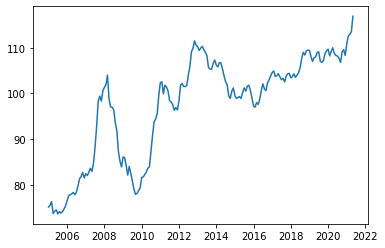

In [5]:
### Visualisation
plt.plot(data["Date"],data["Sales"])

### a) Visualization 2

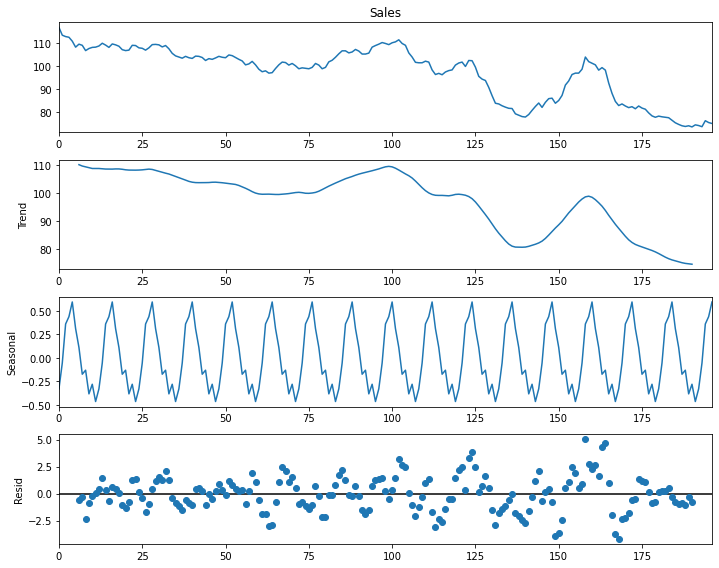

In [6]:
### We create a pandas serie for the values that we want to model thanks to SARIMA

data.reset_index(inplace=True)
#ts_month_avg=data.loc[0:12,"Sales"].astype(float)
ts_month_avg=data.loc[:,"Sales"].astype(float)
ts_month_avg.head()

### Simple visualization: we will not use it

from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

decomposition = sm.tsa.seasonal_decompose(ts_month_avg, model='additive',period=12)
fig = decomposition.plot()
plt.show()

### b), c) and d) Data transformation and statistical tests
We are not using the b step here (included in d)

In [7]:
from statsmodels.tsa.stattools import adfuller

### Statistical test = ADF

def adf_test(timeseries):
    """
     How to interpret the results: if the p-value is less than the critical value, 
     the series is stationary
    
    """
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used',
                                             'Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

print(adf_test(ts_month_avg))

Results of Dickey-Fuller Test:
Test Statistic                  -0.920523
p-value                          0.781139
#Lags Used                       1.000000
Number of Observations Used    195.000000
Critical Value (1%)             -3.464337
Critical Value (5%)             -2.876479
Critical Value (10%)            -2.574733
dtype: float64
None


Results of Dickey-Fuller Test:
Test Statistic                  -0.920523
p-value                          0.781139
#Lags Used                       1.000000
Number of Observations Used    195.000000
Critical Value (1%)             -3.464337
Critical Value (5%)             -2.876479
Critical Value (10%)            -2.574733
dtype: float64
None
Results of Dickey-Fuller Test:
Test Statistic                -9.559745e+00
p-value                        2.443976e-16
#Lags Used                     0.000000e+00
Number of Observations Used    1.950000e+02
Critical Value (1%)           -3.464337e+00
Critical Value (5%)           -2.876479e+00
Critical Value (10%)          -2.574733e+00
dtype: float64
None


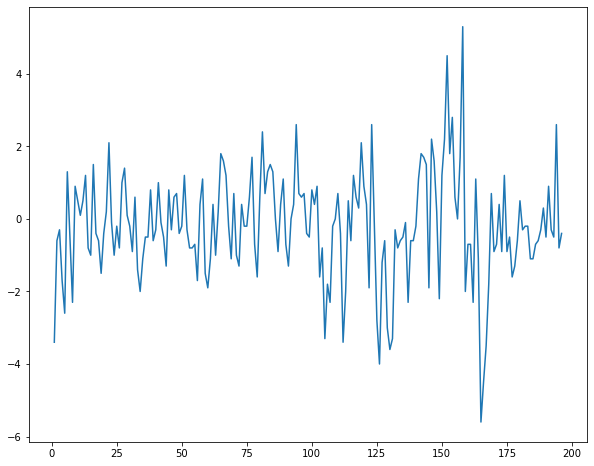

In [8]:
### Trend differentiation

ts_t_adj = ts_month_avg - ts_month_avg.shift(1)
ts_t_adj = ts_t_adj.dropna()
ts_t_adj.plot()

print(adf_test(ts_month_avg))
print(adf_test(ts_t_adj))

Results of Dickey-Fuller Test:
Test Statistic                  -5.219221
p-value                          0.000008
#Lags Used                      12.000000
Number of Observations Used    171.000000
Critical Value (1%)             -3.469181
Critical Value (5%)             -2.878595
Critical Value (10%)            -2.575863
dtype: float64
None


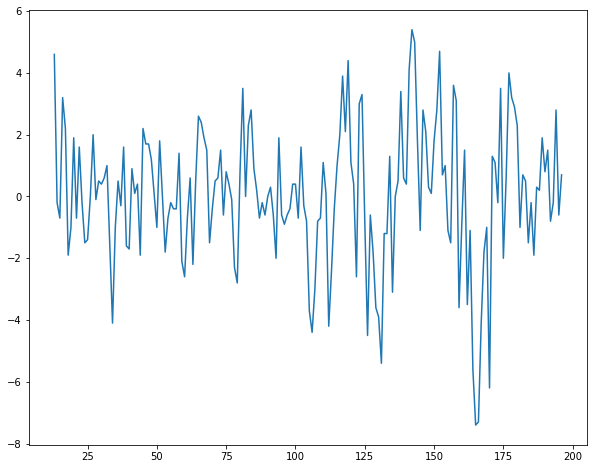

In [9]:
### Seasonal differentiation

ts_s_adj = ts_t_adj - ts_t_adj.shift(12)
ts_s_adj = ts_s_adj.dropna()
ts_s_adj.plot()
print(adf_test(ts_s_adj))

### e) and f) ACF and PCF

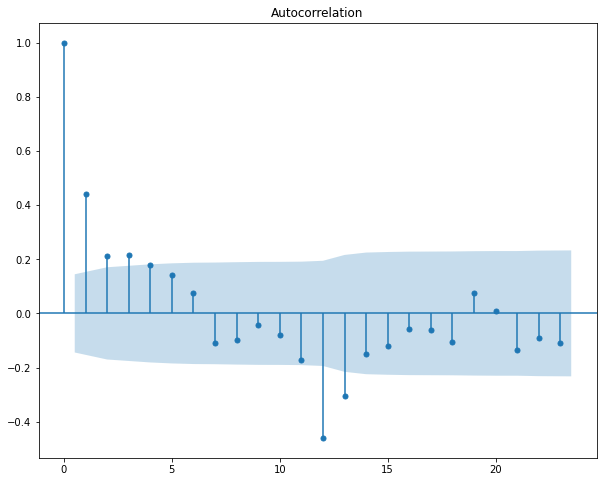

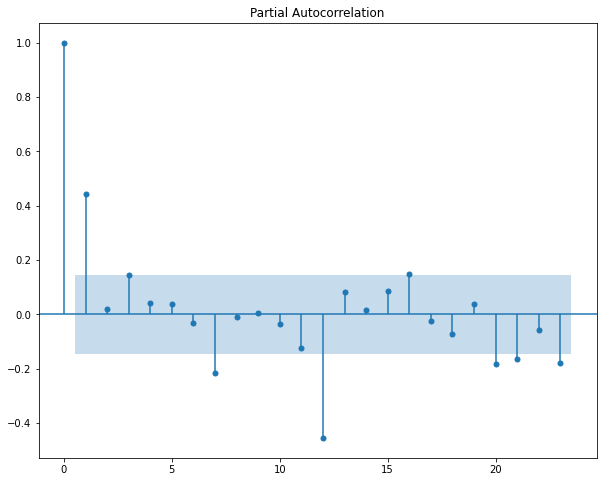

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
    
    
plot_acf(ts_s_adj)
matplotlib.pyplot.show()
plot_pacf(ts_s_adj)
matplotlib.pyplot.show()

### g) Optimization procedure: finding the good values for each paramaters of the SARIMA model

In [11]:
Optimization_results={}
Optimization_results["AIC"]=np.inf
Optimization_results

{'AIC': inf}

In [12]:
### Optimization part

# y is the target
y=ts_s_adj

# The grid search should take into account the former plots visualization to find accurate extreme values
# for the foloowing parameters
p = range(0,3)
d = range(1,2)
q = range(0,3)
lag=12

# Optimisation procedure
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], lag) for x in list(itertools.product(p, d, q))]

#
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            print(param,param_seasonal)
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            ### We are choosing the model by minimizing the AIC
            if results.aic<Optimization_results["AIC"]:
                #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
                Optimization_results["AIC"]=results.aic
                Optimization_results["Parameter"]=param
                Optimization_results["Seasonal parameter"]=param_seasonal
                
            else:   
                continue
                print("problème")
        except:
            continue

(0, 1, 0) (0, 1, 0, 12)
(0, 1, 0) (0, 1, 1, 12)
(0, 1, 0) (0, 1, 2, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.

(0, 1, 0) (1, 1, 0, 12)
(0, 1, 0) (1, 1, 1, 12)
(0, 1, 0) (1, 1, 2, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.

(0, 1, 0) (2, 1, 0, 12)
(0, 1, 0) (2, 1, 1, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(0, 1, 0) (2, 1, 2, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(0, 1, 1) (0, 1, 0, 12)
(0, 1, 1) (0, 1, 1, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(0, 1, 1) (0, 1, 2, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(0, 1, 1) (1, 1, 0, 12)
(0, 1, 1) (1, 1, 1, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(0, 1, 1) (1, 1, 2, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(0, 1, 1) (2, 1, 0, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(0, 1, 1) (2, 1, 1, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(0, 1, 1) (2, 1, 2, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(0, 1, 2) (0, 1, 0, 12)
(0, 1, 2) (0, 1, 1, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(0, 1, 2) (0, 1, 2, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(0, 1, 2) (1, 1, 0, 12)
(0, 1, 2) (1, 1, 1, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(0, 1, 2) (1, 1, 2, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(0, 1, 2) (2, 1, 0, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(0, 1, 2) (2, 1, 1, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(0, 1, 2) (2, 1, 2, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(1, 1, 0) (0, 1, 0, 12)
(1, 1, 0) (0, 1, 1, 12)
(1, 1, 0) (0, 1, 2, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.

(1, 1, 0) (1, 1, 0, 12)
(1, 1, 0) (1, 1, 1, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(1, 1, 0) (1, 1, 2, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(1, 1, 0) (2, 1, 0, 12)
(1, 1, 0) (2, 1, 1, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(1, 1, 0) (2, 1, 2, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(1, 1, 1) (0, 1, 0, 12)
(1, 1, 1) (0, 1, 1, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(1, 1, 1) (0, 1, 2, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(1, 1, 1) (1, 1, 0, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(1, 1, 1) (1, 1, 1, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(1, 1, 1) (1, 1, 2, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(1, 1, 1) (2, 1, 0, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(1, 1, 1) (2, 1, 1, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(1, 1, 1) (2, 1, 2, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(1, 1, 2) (0, 1, 0, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(1, 1, 2) (0, 1, 1, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(1, 1, 2) (0, 1, 2, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(1, 1, 2) (1, 1, 0, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(1, 1, 2) (1, 1, 1, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(1, 1, 2) (1, 1, 2, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(1, 1, 2) (2, 1, 0, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(1, 1, 2) (2, 1, 1, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(1, 1, 2) (2, 1, 2, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(2, 1, 0) (0, 1, 0, 12)
(2, 1, 0) (0, 1, 1, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(2, 1, 0) (0, 1, 2, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(2, 1, 0) (1, 1, 0, 12)
(2, 1, 0) (1, 1, 1, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(2, 1, 0) (1, 1, 2, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(2, 1, 0) (2, 1, 0, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(2, 1, 0) (2, 1, 1, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(2, 1, 0) (2, 1, 2, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(2, 1, 1) (0, 1, 0, 12)
(2, 1, 1) (0, 1, 1, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(2, 1, 1) (0, 1, 2, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(2, 1, 1) (1, 1, 0, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(2, 1, 1) (1, 1, 1, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(2, 1, 1) (1, 1, 2, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(2, 1, 1) (2, 1, 0, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(2, 1, 1) (2, 1, 1, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(2, 1, 1) (2, 1, 2, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(2, 1, 2) (0, 1, 0, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(2, 1, 2) (0, 1, 1, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(2, 1, 2) (0, 1, 2, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(2, 1, 2) (1, 1, 0, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(2, 1, 2) (1, 1, 1, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(2, 1, 2) (1, 1, 2, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(2, 1, 2) (2, 1, 0, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(2, 1, 2) (2, 1, 1, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(2, 1, 2) (2, 1, 2, 12)


C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


### h) Final statistical tests

In [13]:
### Reminder of the best solution
Optimization_results


{'AIC': 599.9226682054592,
 'Parameter': (0, 1, 2),
 'Seasonal parameter': (2, 1, 2, 12)}

In [14]:
mod = sm.tsa.statespace.SARIMAX(ts_s_adj,
                                order=Optimization_results['Parameter'],
                                seasonal_order=Optimization_results['Seasonal parameter'])
results = mod.fit(method = 'powell')
print(results.summary().tables[1])

C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Optimization terminated successfully.
         Current function value: 1.922697
         Iterations: 9
         Function evaluations: 774
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5606      0.069     -8.116      0.000      -0.696      -0.425
ma.L2         -0.2605      0.071     -3.655      0.000      -0.400      -0.121
ar.S.L12      -0.1894      0.185     -1.023      0.306      -0.552       0.174
ar.S.L24      -0.2105      0.112     -1.876      0.061      -0.430       0.009
ma.S.L12      -1.7305     19.132     -0.090      0.928     -39.229      35.768
ma.S.L24       0.7317     13.890      0.053      0.958     -26.493      27.956
sigma2         2.2591     43.461      0.052      0.959     -82.923      87.441


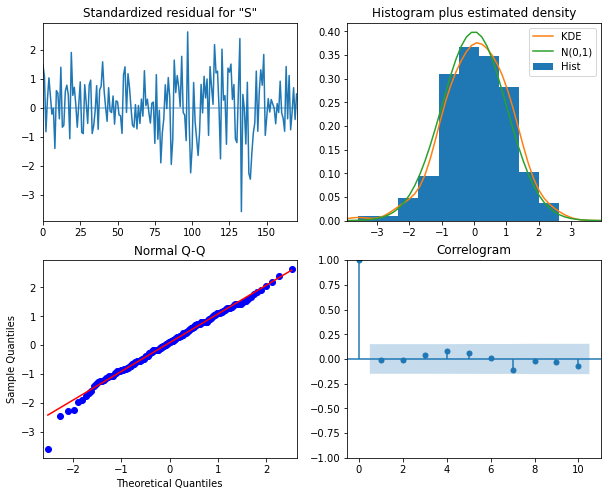

In [19]:
### This charts are not used by our solution
### I have just put them here to remember that they exist and might provide us with useful insights

results.plot_diagnostics(figsize=(10, 8))
plt.show()

# Forecasting

### Function documentation
Link: https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAXResults.get_prediction.html
 The parameters are:
 

##### a) startint => str, or datetime, optional

Zero-indexed observation number at which to start forecasting, i.e., the first forecast is start. Can also be a date string to parse or a datetime type. Default is the the zeroth observation.


##### b) end => int, str, or datetime, optional

Zero-indexed observation number at which to end forecasting, i.e., the last forecast is end. Can also be a date string to parse or a datetime type. However, if the dates index does not have a fixed frequency, end must be an integer index if you want out of sample prediction. Default is the last observation in the sample.

##### c)  dynamic => bool, int, str, or datetime, optional

Integer offset relative to start at which to begin dynamic prediction. Can also be an absolute date string to parse or a datetime type (these are not interpreted as offsets). Prior to this observation, true endogenous values will be used for prediction; starting with this observation and continuing through the end of prediction, forecasted endogenous values will be used instead.

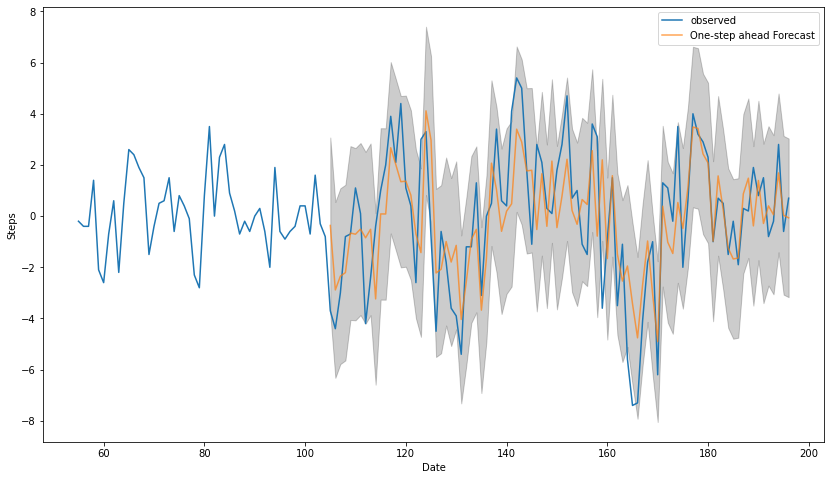

In [16]:
### Forecasting: step 2

# We choose the date from which we will try to forecast the sales
start=pd.to_datetime('2013-09-01')
index_start=data.loc[data["Date"]==start].index[0]

# Predictions 
pred = results.get_prediction(start=index_start, dynamic=False)


# Confidence interval
pred_ci = pred.conf_int()
#pred_ci_bis = pred_bis.conf_int()

# Visualization
# We choose the length of thetime series we want to show
before=50
ts_s_adj_graphique=ts_s_adj[int(index_start-before):]
ax = ts_s_adj_graphique.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 8))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1],
                color='k', alpha=.2)
                

ax.set_xlabel('Date')
ax.set_ylabel('Steps')
plt.legend()
plt.show()

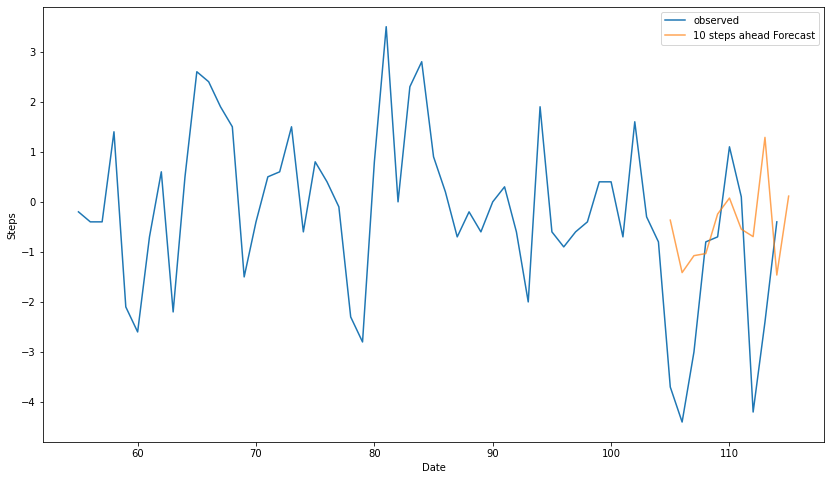

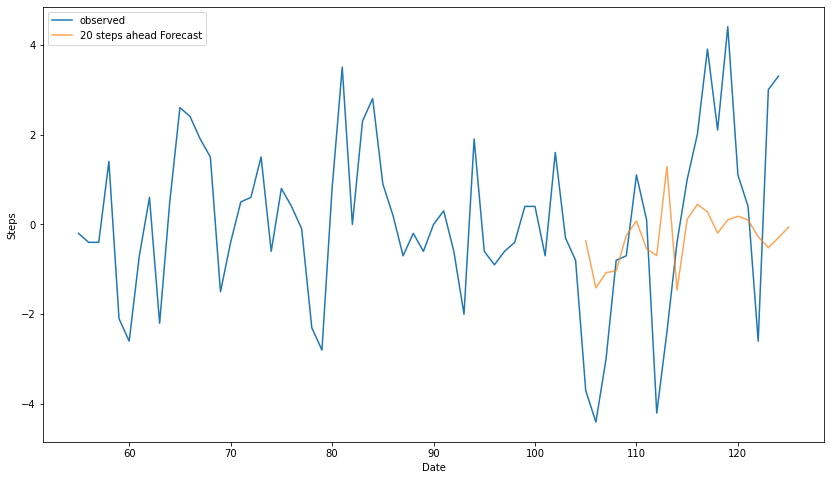

In [20]:
### Forecasts for a longer period

# Period to run the forecast 
end_forecast_1=10
end_forecast_2=20


pred_bis = results.get_prediction(start=index_start, end=index_start+end_forecast_1, dynamic=True)
pred_ter = results.get_prediction(start=index_start, end=index_start+end_forecast_2, dynamic=True)



ts_s_adj_graphique=ts_s_adj[int(index_start-before):int(index_start+end_forecast_1)]
ax1 =  ts_s_adj_graphique.plot(label='observed')

pred_bis.predicted_mean.plot(ax=ax1, label='{} steps ahead Forecast'.format(end_forecast_1), alpha=.7, figsize=(14, 8))
ax1.set_xlabel('Date')
ax1.set_ylabel('Steps')
plt.legend()
plt.show()


ts_s_adj_graphique=ts_s_adj[int(index_start-before):int(index_start+end_forecast_2)]
ax2 = ts_s_adj_graphique.plot(label='observed')

pred_ter.predicted_mean.plot(ax=ax2, label='{} steps ahead Forecast'.format(end_forecast_2), alpha=.7, figsize=(14, 8))
ax2.set_xlabel('Date')
ax2.set_ylabel('Steps')
plt.legend()
plt.show()

In [18]:
### Forecasting: step 3
# Some indicators
y_forecasted = pred.predicted_mean
y_truth = ts_s_adj[index_start]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 3.89
The Root Mean Squared Error is 1.97
